OLS Coefficients:
alpha_0 = 20408121912.10408
alpha_1 = -14568400696.270214
alpha_2 = -3856464624.2409625
alpha_3 = 757901877.0153055
alpha_4 = 115532562.30451658
alpha_5 = -10730158.01537476
alpha_6 = -1216909.536326421
alpha_7 = 55187.0770441253
alpha_8 = 5196.932387426496
alpha_9 = -94.03595161437988
alpha_10 = -12.809656143188477
OLS Loss (MSE): 2.3814420856327216e+21

Ridge Regression Coefficients (lambda = 1e-10):
alpha_0 = 20407681965.410744
alpha_1 = -14568442698.105576
alpha_2 = -3856426401.1193137
alpha_3 = 757901206.6751835
alpha_4 = 115532235.32411213
alpha_5 = -10730154.689027168
alpha_6 = -1216908.7087975696
alpha_7 = 55187.07190989719
alpha_8 = 5196.931742156387
alpha_9 = -94.0359499699465
alpha_10 = -12.809656708363088
Ridge Loss (MSE) with λ=1e-10: 2.3814420838042797e+21

Ridge Regression Coefficients (lambda = 1e-05):
alpha_0 = 20407603833.788418
alpha_1 = -14568427885.870955
alpha_2 = -3856419257.612427
alpha_3 = 757900655.9829522
alpha_4 = 115532081.90134858
alpha_5

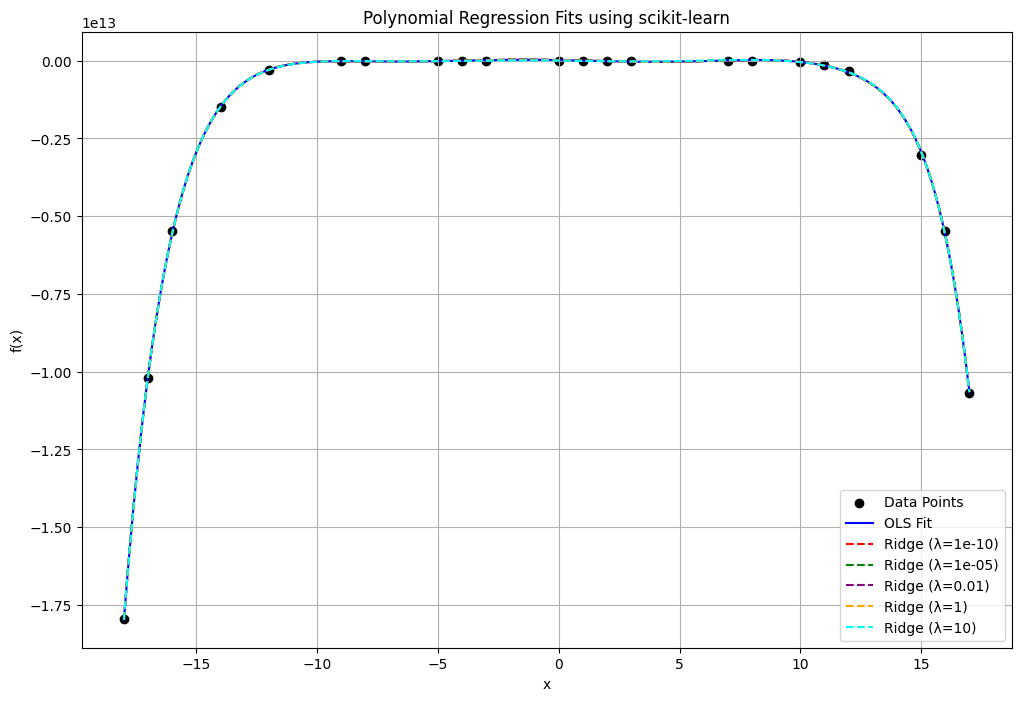

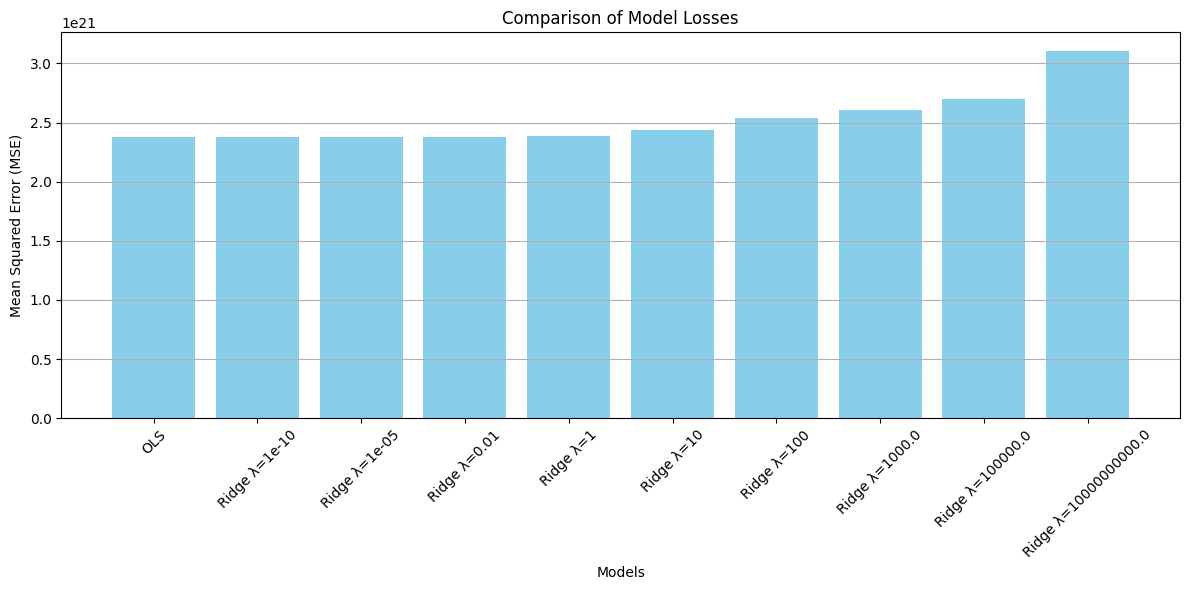


Model Losses:
OLS: MSE = 2.3814420856327216e+21
Ridge λ=1e-10: MSE = 2.3814420838042797e+21
Ridge λ=1e-05: MSE = 2.381442083805085e+21
Ridge λ=0.01: MSE = 2.381442913629653e+21
Ridge λ=1: MSE = 2.3860844298838595e+21
Ridge λ=10: MSE = 2.4341087430072043e+21
Ridge λ=100: MSE = 2.5426315928168463e+21
Ridge λ=1000.0: MSE = 2.603916618088022e+21
Ridge λ=100000.0: MSE = 2.7009166927862374e+21
Ridge λ=10000000000.0: MSE = 3.108179933711036e+21

The model with the lowest loss is 'Ridge λ=1e-10' with an MSE of 2.3814420838042797e+21.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Given data points (xi, yi)
data_points = [
    (-8, -5596651258.19),
    (2, -8237.31),
    (3, -352274.59),
    (-12, -300037089204.51),
    (-14, -1500604580958.77),
    (-9, -17076995405.61),
    (-18, -17951491328205.89),
    (8, -5618239470.55),
    (10, -49294585624.85),
    (17, -10686759133709.8),
    (-17, -10206442079857.7),
    (11, -138129932078.36),
    (-3, -314414.78),
    (7, -1423531684.97),
    (0, -8.65),
    (15, -3044238622243.01),
    (12, -322747589849.17),
    (-5, -51652363.73),
    (16, -5484652989529.42),
    (-16, -5459994517073.17),
    (-4, -5412864.17),
    (1, -26.07),
]

# Separate the data into X and y
X = np.array([point[0] for point in data_points]).reshape(-1, 1)
y = np.array([point[1] for point in data_points])

# Degree of the polynomial
degree = 10  # Since ξ15 = 2

# Generate polynomial features
poly_features = PolynomialFeatures(degree=degree, include_bias=True)
X_poly = poly_features.fit_transform(X)

# List to store model names and their corresponding losses
model_names = []
model_losses = []

# Ordinary Least Squares (OLS) Regression using scikit-learn
ols_model = LinearRegression(fit_intercept=False)
ols_model.fit(X_poly, y)
ols_coefficients = ols_model.coef_

# Calculate the loss (Mean Squared Error) for OLS
y_pred_ols = ols_model.predict(X_poly)
ols_loss = mean_squared_error(y, y_pred_ols)
model_names.append("OLS")
model_losses.append(ols_loss)

print("OLS Coefficients:")
for i, coef in enumerate(ols_coefficients):
    print(f"alpha_{i} = {coef}")
print(f"OLS Loss (MSE): {ols_loss}")

# Ridge Regression using scikit-learn
lambda_values = [1e-10, 1e-5, 1e-2, 1, 10, 100, 1e3, 1e5, 1e10]
ridge_coefficients = {}
ridge_losses = {}

for lambda_val in lambda_values:
    ridge_model = Ridge(alpha=lambda_val, fit_intercept=False, solver="cholesky")
    ridge_model.fit(X_poly, y)
    ridge_coefficients[lambda_val] = ridge_model.coef_

    # Calculate the loss (Mean Squared Error) for Ridge Regression
    y_pred_ridge = ridge_model.predict(X_poly)
    ridge_loss = mean_squared_error(y, y_pred_ridge)
    model_names.append(f"Ridge λ={lambda_val}")
    model_losses.append(ridge_loss)
    ridge_losses[lambda_val] = ridge_loss

    print(f"\nRidge Regression Coefficients (lambda = {lambda_val}):")
    for i, coef in enumerate(ridge_model.coef_):
        print(f"alpha_{i} = {coef}")
    print(f"Ridge Loss (MSE) with λ={lambda_val}: {ridge_loss}")

# Plotting the results
plt.figure(figsize=(12, 8))

# Scatter plot of the original data
plt.scatter(X, y, color="black", label="Data Points")

# Generate a range of X values for plotting the fitted models
X_plot = np.linspace(min(X), max(X), 500).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)

# Plot OLS fitted model
y_ols_plot = ols_model.predict(X_plot_poly)
plt.plot(X_plot, y_ols_plot, color="blue", label="OLS Fit")

# Plot Ridge Regression models for selected lambda values
colors = ["red", "green", "purple", "orange", "cyan"]
for i, lambda_val in enumerate(lambda_values[:5]):
    ridge_model = Ridge(alpha=lambda_val, fit_intercept=False, solver="cholesky")
    ridge_model.fit(X_poly, y)
    y_ridge_plot = ridge_model.predict(X_plot_poly)
    plt.plot(
        X_plot,
        y_ridge_plot,
        color=colors[i],
        linestyle="--",
        label=f"Ridge (λ={lambda_val})",
    )

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Polynomial Regression Fits using scikit-learn")
plt.legend()
plt.grid(True)
plt.show()

# Plotting the bar chart of losses
plt.figure(figsize=(12, 6))
plt.bar(model_names, model_losses, color="skyblue")
plt.xlabel("Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Model Losses")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Conclusion based on the losses
print("\nModel Losses:")
for name, loss in zip(model_names, model_losses):
    print(f"{name}: MSE = {loss}")

# Identify the model with the lowest loss
min_loss = min(model_losses)
best_model_index = model_losses.index(min_loss)
best_model_name = model_names[best_model_index]

print(
    f"\nThe model with the lowest loss is '{best_model_name}' with an MSE of {min_loss}."
)
